# DuckDB 入门教程

DuckDB是一个嵌入式SQL分析数据库管理系统，类似于SQLite，但专为分析查询而优化。本教程将帮助您快速入门DuckDB，并展示其核心功能。

## 1. 安装DuckDB

首先，我们需要安装DuckDB。如果尚未安装，可以使用pip进行安装：

In [ ]:
# 安装DuckDB
# 如果已安装，请跳过此步骤
# !pip install duckdb

## 2. 导入DuckDB并创建连接

In [1]:
import duckdb

# 创建内存数据库连接
con = duckdb.connect(':memory:')

# 如果想保存到磁盘文件，可以指定文件路径
# con = duckdb.connect('my_database.duckdb')

print("DuckDB 版本:", duckdb.__version__)

DuckDB 版本: 1.2.2


## 3. 创建表并插入数据

下面展示如何创建表格并插入数据：

In [ ]:
# 创建一个简单的表
# 使用 con (DuckDB连接对象) 的 execute 方法执行SQL语句
con.execute("""
CREATE TABLE employees (  -- 创建名为 employees 的表
    id INTEGER,           -- 定义 id 列，类型为整数
    name VARCHAR,         -- 定义 name 列，类型为可变长度字符串
    department VARCHAR,   -- 定义 department 列，类型为可变长度字符串
    salary FLOAT          -- 定义 salary 列，类型为浮点数
)
""")

# 插入数据
# 再次使用 con.execute 方法执行SQL语句，向 employees 表中插入数据
con.execute("""
INSERT INTO employees VALUES  -- 向 employees 表插入数据行
    (1, '张三', '研发部', 12000),  -- 插入第一条员工记录
    (2, '李四', '市场部', 10000),  -- 插入第二条员工记录
    (3, '王五', '研发部', 15000),  -- 插入第三条员工记录
    (4, '赵六', '财务部', 9000),   -- 插入第四条员工记录
    (5, '钱七', '市场部', 11000)   -- 插入第五条员工记录
""")

## 4. 查询数据

现在我们可以执行SQL查询来检索和分析数据：

In [ ]:
# 基本查询
result = con.execute("SELECT * FROM employees").fetchall()
print("所有员工:")
index = 0  # 初始化索引变量
for row in result:
    # 打印类型
    if index == 0:
        print(type(row))  # 打印第一行的类型
    index += 1  # 索引加1
    
    print(row)


所有员工:
(1, '张三', '研发部', 12000.0)
<class 'tuple'>
(2, '李四', '市场部', 10000.0)
(3, '王五', '研发部', 15000.0)
(4, '赵六', '财务部', 9000.0)
(5, '钱七', '市场部', 11000.0)


In [7]:
# 筛选查询
result = con.execute("""
SELECT name, department, salary 
FROM employees 
WHERE department = '研发部'
""").fetchall()
print("\n研发部员工:")
for row in result:
    print(row)


研发部员工:
('张三', '研发部', 12000.0)
('王五', '研发部', 15000.0)


In [ ]:
# 聚合查询
# 执行SQL聚合查询，计算每个部门的平均薪资和员工数量
result = con.execute("""
SELECT 
    department,  -- 选择部门列
    AVG(salary) as avg_salary,  -- 计算平均薪资，并命名为 avg_salary
    COUNT(*) as employee_count  -- 计算每个部门的员工数量，并命名为 employee_count
FROM 
    employees  -- 从 employees 表中查询
GROUP BY 
    department  -- 按部门进行分组
ORDER BY 
    avg_salary DESC  -- 按平均薪资降序排列
""").fetchall()  # 获取所有查询结果行

print("\n各部门平均薪资:")  
# 遍历查询结果
for row in result:
    # 打印每个部门的名称、平均薪资（保留两位小数）和员工数量
    print(f"{row[0]}: 平均薪资 {row[1]:.2f}, 员工数 {row[2]}")


各部门平均薪资:
研发部: 平均薪资 13500.00, 员工数 2
市场部: 平均薪资 10500.00, 员工数 2
财务部: 平均薪资 9000.00, 员工数 1


## 5. 与Pandas集成

DuckDB与Pandas有很好的集成，可以直接查询Pandas DataFrame：

In [9]:
import pandas as pd

# 创建一个Pandas DataFrame
df = pd.DataFrame({
    'id': [1, 2, 3, 4, 5],
    'product': ['笔记本电脑', '手机', '平板电脑', '耳机', '智能手表'],
    'category': ['电脑', '手机', '电脑', '配件', '配件'],
    'price': [6999, 3999, 2999, 599, 1299],
    'stock': [50, 120, 75, 200, 60]
})

print("Pandas DataFrame:")
display(df)

Pandas DataFrame:


,id,product,category,price,stock
0,1,笔记本电脑,电脑,6999,50
1,2,手机,手机,3999,120
2,3,平板电脑,电脑,2999,75
3,4,耳机,配件,599,200
4,5,智能手表,配件,1299,60


In [10]:
# 使用DuckDB查询Pandas DataFrame
# con 是之前创建的 DuckDB 连接对象
# df 是之前创建的 Pandas DataFrame
result = con.execute("""
SELECT 
    category,  -- 选择产品类别列
    AVG(price) as avg_price,  -- 计算每个类别的平均价格，并将结果列命名为 avg_price
    SUM(stock) as total_stock -- 计算每个类别的总库存量，并将结果列命名为 total_stock
FROM 
    df  -- 从名为 df 的 Pandas DataFrame 中查询 (DuckDB可以直接查询内存中的DataFrame)
GROUP BY 
    category  -- 按产品类别对结果进行分组
ORDER BY 
    avg_price DESC  -- 按平均价格降序排列结果
""").df()  # 将查询结果转换为 Pandas DataFrame

print("DuckDB查询结果:")
display(result)  # 在Jupyter环境中以表格形式显示结果DataFrame

DuckDB查询结果:


,category,avg_price,total_stock
0,电脑,4999.0,125.0
1,手机,3999.0,120.0
2,配件,949.0,260.0


## 6. 导入/导出数据文件

DuckDB可以直接查询CSV、Parquet等格式的文件，无需预先加载到内存中。

In [11]:
# 首先创建一个示例CSV文件
sample_df = pd.DataFrame({
    'date': pd.date_range('2023-01-01', periods=10),
    'value': [100, 105, 98, 120, 110, 115, 130, 125, 140, 135]
})
sample_df.to_csv('sample_data.csv', index=False)

# 直接查询CSV文件
result = con.execute("""
SELECT * FROM 'sample_data.csv'
""").df()

print("从CSV文件中读取的数据:")
display(result)

从CSV文件中读取的数据:


,date,value
0,2023-01-01,100
1,2023-01-02,105
2,2023-01-03,98
3,2023-01-04,120
4,2023-01-05,110
5,2023-01-06,115
6,2023-01-07,130
7,2023-01-08,125
8,2023-01-09,140
9,2023-01-10,135


In [12]:
# 对CSV数据执行分析查询
# 使用 con (DuckDB连接对象) 的 execute 方法执行SQL语句
result = con.execute("""
SELECT 
    strftime(date, '%Y-%m') as month,  -- 从 date 列提取年份和月份，并命名为 month
    AVG(value) as avg_value,          -- 计算每个月的平均 value 值，并命名为 avg_value
    MIN(value) as min_value,          -- 计算每个月的最小 value 值，并命名为 min_value
    MAX(value) as max_value           -- 计算每个月的最大 value 值，并命名为 max_value
FROM 'sample_data.csv'                -- 从名为 'sample_data.csv' 的CSV文件中查询数据
GROUP BY month                        -- 按 month (年份和月份) 对结果进行分组
""").df()  # 将查询结果转换为 Pandas DataFrame

print("按月汇总分析:")  # 打印提示信息
display(result)      # 在Jupyter环境中以表格形式显示结果DataFrame

按月汇总分析:


,month,avg_value,min_value,max_value
0,2023-01,117.8,98,140


## 7. 数据可视化

结合DuckDB和matplotlib/seaborn进行数据可视化：

Text(0, 0.5, '平均薪资(元)')

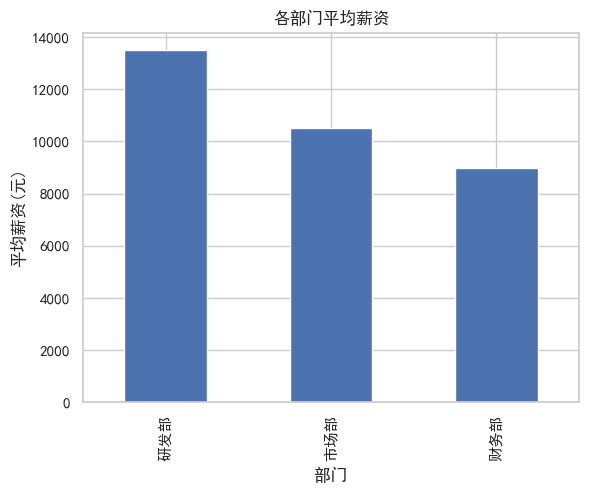

In [21]:


# 从DuckDB查询数据
# 使用 con (DuckDB连接对象) 的 execute 方法执行SQL语句
dept_data = con.execute("""
SELECT department, AVG(salary) as avg_salary  -- 选择部门列，并计算每个部门的平均薪资，命名为 avg_salary
FROM employees                               -- 从 employees 表中查询
GROUP BY department                           -- 按部门进行分组
ORDER BY avg_salary DESC                      -- 按平均薪资降序排列
""").df()  # 将查询结果转换为 Pandas DataFrame


# 创建条形图
# x轴为 'department' (部门)，y轴为 'avg_salary' (平均薪资)，数据来源为 dept_data DataFrame
ax = dept_data.plot(x='department', y='avg_salary', kind='bar', legend=False)
ax.set_title('各部门平均薪资')  # 设置图表标题
ax.set_xlabel('部门')              # 设置x轴标签
ax.set_ylabel('平均薪资(元)')      # 设置y轴标签



## 8. 高级功能：窗口函数(Window Functions)

DuckDB支持SQL标准窗口函数，可以进行复杂的分析计算：

In [22]:
# 先插入更多数据以便演示窗口函数的功能
# 使用 con (DuckDB连接对象) 的 execute 方法执行SQL语句，向 employees 表中插入更多员工数据
con.execute("""
INSERT INTO employees VALUES  -- 向 employees 表插入新的数据行
    (6, '陈八', '研发部', 13500),  -- 插入第六条员工记录
    (7, '林九', '财务部', 9500),   -- 插入第七条员工记录
    (8, '黄十', '研发部', 16000),  -- 插入第八条员工记录
    (9, '吴一', '市场部', 12000),  -- 插入第九条员工记录
    (10, '郑二', '财务部', 10500)  -- 插入第十条员工记录
""")

# 使用窗口函数进行高级分析
# con.execute() 执行包含窗口函数的SQL查询
result = con.execute("""
SELECT 
    id,                                                                 -- 选择员工ID
    name,                                                               -- 选择员工姓名
    department,                                                         -- 选择员工所在部门
    salary,                                                             -- 选择员工薪资
    RANK() OVER (PARTITION BY department ORDER BY salary DESC) as dept_rank, -- 计算每个部门内员工的薪资排名 (薪资越高，排名越靠前)
                                                                        -- PARTITION BY department: 按部门分区，即在每个部门内部进行计算
                                                                        -- ORDER BY salary DESC: 按薪资降序排列来确定排名
    AVG(salary) OVER (PARTITION BY department) as dept_avg,             -- 计算每个部门的平均薪资
                                                                        -- PARTITION BY department: 同样按部门分区，计算各部门自己的平均薪资
    salary - AVG(salary) OVER (PARTITION BY department) as diff_from_avg -- 计算每个员工薪资与其所在部门平均薪资的差额
FROM employees                                                          -- 从 employees 表中查询数据
ORDER BY department, dept_rank                                          -- 最终结果按部门名称升序排列，同一部门内按薪资排名升序排列
""").df()  # 将查询结果转换为 Pandas DataFrame，方便在Jupyter中显示和后续操作

print("使用窗口函数的高级分析:")  # 打印提示信息
display(result)  # 在Jupyter环境中以表格形式显示包含窗口函数计算结果的DataFrame

使用窗口函数的高级分析:


,id,name,department,salary,dept_rank,dept_avg,diff_from_avg
0,9,吴一,市场部,12000.0,1,11000.000000,1000.000000
1,5,钱七,市场部,11000.0,2,11000.000000,0.000000
2,2,李四,市场部,10000.0,3,11000.000000,-1000.000000
3,8,黄十,研发部,16000.0,1,14125.000000,1875.000000
4,3,王五,研发部,15000.0,2,14125.000000,875.000000
5,6,陈八,研发部,13500.0,3,14125.000000,-625.000000
6,1,张三,研发部,12000.0,4,14125.000000,-2125.000000
7,10,郑二,财务部,10500.0,1,9666.666667,833.333333
8,7,林九,财务部,9500.0,2,9666.666667,-166.666667
9,4,赵六,财务部,9000.0,3,9666.666667,-666.666667


## 9. 连接查询(Joins)

演示如何进行表连接操作：

In [23]:
# 创建部门表 - 定义表结构，包含部门ID、名称和地点
con.execute("""
CREATE TABLE departments (
    dept_id INTEGER PRIMARY KEY,
    dept_name VARCHAR,
    location VARCHAR
)
""")

# 插入部门数据
con.execute("""
INSERT INTO departments VALUES
    (1, '研发部', '北京'),
    (2, '市场部', '上海'),
    (3, '财务部', '广州'),
    (4, '人力资源部', '深圳')
""")

# 展示部门表
print("部门表:")
display(con.execute("SELECT * FROM departments").df())

部门表:


,dept_id,dept_name,location
0,1,研发部,北京
1,2,市场部,上海
2,3,财务部,广州
3,4,人力资源部,深圳


In [24]:
# 执行JOIN查询
# 使用 con (DuckDB连接对象) 的 execute 方法执行SQL语句
result = con.execute("""
SELECT 
    e.id,           -- 选择员工表 (别名e) 的 id 列
    e.name,         -- 选择员工表 (别名e) 的 name 列
    e.salary,       -- 选择员工表 (别名e) 的 salary 列
    e.department,   -- 选择员工表 (别名e) 的 department 列
    d.location      -- 选择部门表 (别名d) 的 location 列
FROM 
    employees e     -- 从 employees 表 (并为其设置别名 e) 开始查询
JOIN 
    departments d ON e.department = d.dept_name  -- 将 employees 表 (e) 与 departments 表 (d) 进行连接
                                                -- 连接条件是 e 表的 department 列等于 d 表的 dept_name 列
ORDER BY 
    d.location, e.salary DESC  -- 按部门表 (d) 的 location 列升序排列，然后在同一 location 内按员工表 (e) 的 salary 列降序排列
""").df()  # 将查询结果转换为 Pandas DataFrame

print("员工和部门数据连接:")  # 打印提示信息
display(result)  # 在Jupyter环境中以表格形式显示连接后的结果DataFrame

员工和部门数据连接:


,id,name,salary,department,location
0,9,吴一,12000.0,市场部,上海
1,5,钱七,11000.0,市场部,上海
2,2,李四,10000.0,市场部,上海
3,8,黄十,16000.0,研发部,北京
4,3,王五,15000.0,研发部,北京
5,6,陈八,13500.0,研发部,北京
6,1,张三,12000.0,研发部,北京
7,10,郑二,10500.0,财务部,广州
8,7,林九,9500.0,财务部,广州
9,4,赵六,9000.0,财务部,广州


## 10. 使用自定义函数(UDF)

DuckDB支持通过Python自定义函数(UDF)来扩展SQL功能：

In [ ]:
import duckdb # 导入 duckdb 模块，确保 duckdb.typing 可用

# 定义一个Python函数，用于根据薪资评定等级
def salary_grade(salary):
    if salary >= 15000:
        return 'A'  # 薪资大于等于15000，等级为A
    elif salary >= 12000:
        return 'B'  # 薪资大于等于12000但小于15000，等级为B
    elif salary >= 10000:
        return 'C'  # 薪资大于等于10000但小于12000，等级为C
    else:
        return 'D'  # 薪资小于10000，等级为D

# 将Python函数注册为DuckDB的自定义函数(UDF)
# 'salary_grade' 是在SQL中调用的函数名
# salary_grade 是上面定义的Python函数
# [duckdb.typing.FLOAT] 指定了输入参数的类型，这里是单个浮点数 (对应employees表中的salary列，其类型为FLOAT)
# duckdb.typing.VARCHAR 指定了函数的返回类型，这里是字符串 (A, B, C, D)

# 不要重复注册函数，如果已经注册过了，可以注释掉下面的代码
# con.create_function('salary_grade', salary_grade, [duckdb.typing.FLOAT], duckdb.typing.VARCHAR)

# 使用自定义函数执行SQL查询
result = con.execute("""
SELECT 
    name,                   -- 选择员工姓名
    department,             -- 选择员工部门
    salary,                 -- 选择员工薪资
    salary_grade(salary) as grade  -- 调用自定义函数 salary_grade 计算薪资等级，并将结果列命名为 grade
FROM 
    employees               -- 从 employees 表中查询
ORDER BY 
    grade, salary DESC      -- 按薪资等级升序排列，同一等级内按薪资降序排列
""").df()  # 将查询结果转换为 Pandas DataFrame

print("使用自定义函数的查询结果:") # 打印提示信息
display(result)  # 在Jupyter环境中以表格形式显示结果DataFrame

使用自定义函数的查询结果:


,name,department,salary,grade
0,黄十,研发部,16000.0,A
1,王五,研发部,15000.0,A
2,陈八,研发部,13500.0,B
3,张三,研发部,12000.0,B
4,吴一,市场部,12000.0,B
5,钱七,市场部,11000.0,C
6,郑二,财务部,10500.0,C
7,李四,市场部,10000.0,C
8,林九,财务部,9500.0,D
9,赵六,财务部,9000.0,D


## 11. 汇总统计和透视表

DuckDB可以轻松实现类似Excel透视表的功能：

In [30]:
# PIVOT功能示例：按部门和薪资等级统计员工数量
# 使用 con (DuckDB连接对象) 的 execute 方法执行SQL语句
result = con.execute("""
SELECT * FROM ( -- 从子查询的结果中选择所有列
    SELECT 
        department,  -- 选择部门列
        salary_grade(salary) as grade,  -- 调用之前定义的UDF salary_grade 根据薪资计算等级，并命名为 grade
        COUNT(*) as count  -- 计算每个分组 (部门和薪资等级) 的员工数量，并命名为 count
    FROM employees  -- 从 employees 表中查询
    GROUP BY department, grade  -- 按部门和薪资等级进行分组
) PIVOT ( -- 使用 PIVOT 子句进行数据透视操作
    SUM(count) FOR grade IN ('A', 'B', 'C', 'D')  -- 对 count 列进行求和 (SUM(count))
                                                -- FOR grade IN ('A', 'B', 'C', 'D') 表示将 grade 列中的 'A', 'B', 'C', 'D' 值转换为新的列名
                                                -- 这样，每个部门会有一行，列是 A, B, C, D，值是对应等级的员工数量
)
""").df()  # 将查询结果转换为 Pandas DataFrame

print("各部门薪资等级分布:")  # 打印提示信息
display(result)  # 在Jupyter环境中以表格形式显示透视表结果DataFrame

各部门薪资等级分布:


,department,A,B,C,D
0,研发部,2.0,2.0,NaN,NaN
1,市场部,NaN,1.0,2.0,NaN
2,财务部,NaN,NaN,1.0,2.0


## 12. 总结

本教程介绍了DuckDB的基本用法和一些高级功能：

1. 基本连接和查询操作
2. 表的创建和数据插入
3. 与Pandas的结合使用
4. 直接处理CSV等文件数据
5. 结合可视化工具展示数据
6. 高级SQL功能：窗口函数、连接、自定义函数等

DuckDB作为一个轻量级但功能强大的分析型数据库，特别适合数据科学和分析工作流程，可以高效处理中等规模的数据集。